In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

## **DIFFRACTION SPACING FROM SODIUM LAMP**
Goal: Obtain diffraction spacing from the diffraction grating $d_{av}$ to use for the Hydrogen data analysis...

In [2]:
# Import Excel file
sodium = pandas.read_excel("Bohr_Atom.xlsx", sheet_name=0)
sodium.head()

,Trial,Order m,λ_nm,angle_left (°),angle_left (arcminutes),total_angle_left (°),total_angle_left_RE (°),angle_right (°),angle_right (arcminutes),total_angle_right (°),total_angle_right_RE (°)
0,1,1,588.995,69.0,19,69.633333,0.008333,111.0,5,111.166667,0.008333
1,2,2,588.995,55.0,0,55.000000,0.008333,136.0,10,136.333333,0.008333
2,3,1,589.592,69.0,10,69.333333,0.008333,111.0,8,111.266667,0.008333
3,4,2,589.592,49.5,0,49.500000,0.008333,135.5,9,135.800000,0.008333
4,5,1,588.995,69.0,15,69.500000,0.008333,111.0,0,111.000000,0.008333


In [3]:
# Import Excel data
m1 = sodium["Order m"].to_numpy()  # fringe order
theta_left1 = np.radians(sodium["total_angle_left (°)"].to_numpy())
theta_left_err1 = np.radians(sodium["total_angle_left_RE (°)"].to_numpy())
theta_right1 = np.radians(sodium["total_angle_right (°)"].to_numpy())
theta_right_err1 = np.radians(sodium["total_angle_right_RE (°)"].to_numpy())

In [4]:
# Diffraction angle for each order m in radians
theta1 = abs(theta_left1 - theta_right1) / 2
theta_err1 = 0.5 * np.sqrt(theta_left_err1 ** 2 + theta_right_err1 ** 2) # error prop

# Determination of sin(θ)
sin_theta1 = np.sin(theta1)
sin_theta_err1 = np.cos(theta1) * theta_err1 # error prop

print(theta1, theta_err1)

[0.36244671 0.70976723 0.36593737 0.75310957 0.36215582 0.84066692
 0.36302848 0.70074969] [0.00010284 0.00010284 0.00010284 0.00010284 0.00010284 0.00010284
 0.00010284 0.00010284]


In [5]:
# Calculate diffraction spacing for each trial
lambda_m = sodium["λ_nm"].to_numpy() * 1e-9
d_each = (m1 * lambda_m) / sin_theta1
d_each_err = d_each * (sin_theta_err1 / sin_theta1)

print(d_each, d_each_err)

[1.66118554e-06 1.80768347e-06 1.64771161e-06 1.72417832e-06
 1.66246091e-06 1.58100767e-06 1.66032228e-06 1.82878510e-06] [4.50538914e-10 2.16395208e-10 4.42222226e-10 1.89159568e-10
 4.51280731e-10 1.45549658e-10 4.49515785e-10 2.22957592e-10]


In [6]:
# Calculate average d using weighted 
w_d = 1.0 / (d_each_err**2)

d_wmean = np.sum(w_d * d_each) / np.sum(w_d)
d_wmean_err = np.sqrt(1.0 / np.sum(w_d))

In [8]:
print(f"d = ({d_wmean:.4e} ± {d_wmean_err:.4e}) m")
print(d_wmean_err * 1e6)

d = (1.6935e-06 ± 8.5585e-11) m
8.558505676512387e-05


## **HYDROGEN DATA ANALYSIS**
Goal: Confirm Bohr's theory 

- Plot 1/lambda over 1/n_i to confirm the value of R
- Determine average wavelength for each colour
- T-tests between nominal wavelengths and experimentally determined wavelength for each colour

### $H_{\alpha}$ 

Theoretical value of wavelength is $\lambda_{red}=656.11 nm$

In [9]:
# Import Excel file
hydrogen_red = pandas.read_excel("Bohr_Atom.xlsx", sheet_name=1)
hydrogen_red.head()

,Trial,Order m,angle_left (°),angle_left (arcminutes),total_angle_left (°),total_angle_left_RE (°),angle_right (°),angle_right (arcminutes),total_angle_right (°),total_angle_right_RE (°)
0,1,1,113.0,22,113.733333,0.008333,66.5,0,66.5,0.008333
1,2,1,108.5,0,108.500000,0.008333,61.5,21,61.5,0.008333
2,3,1,108.5,0,108.500000,0.008333,62.0,0,62.0,0.008333
3,1,2,142.5,15,143.000000,0.008333,38.0,0,38.0,0.008333
4,2,2,137.5,0,137.500000,0.008333,32.0,10,32.0,0.008333


In [10]:
# Import Excel data
order_r = hydrogen_red["Order m"].to_numpy()  # fringe order
theta_left_r = np.radians(hydrogen_red["total_angle_left (°)"].to_numpy())
theta_left_err_r = np.radians(hydrogen_red["total_angle_left_RE (°)"].to_numpy())
theta_right_r = np.radians(hydrogen_red["total_angle_right (°)"].to_numpy())
theta_right_err_r = np.radians(hydrogen_red["total_angle_right_RE (°)"].to_numpy())

In [11]:
# Diffraction angle for each order m in radians
theta_r = abs(theta_left_r - theta_right_r) / 2
theta_err_r = 0.5 * np.sqrt(theta_left_err_r ** 2 + theta_right_err_r ** 2) # error prop

print(theta_r, theta_err_r)

[0.41218859 0.41015237 0.40578905 0.91629786 0.92066118 0.9250245 ] [0.00010284 0.00010284 0.00010284 0.00010284 0.00010284 0.00010284]


In [12]:
# Wavelength for each trial (meters)
red_lambda_each = (d_wmean * np.sin(theta_r)) / order_r

# Wavelength uncertainty for each trial (meters)
red_lambda_each_err = np.sqrt((np.sin(theta_r) * d_wmean_err / order_r)**2 + (d_wmean * np.cos(theta_r) * theta_err_r / order_r)**2)

red_lambda_each_nm = red_lambda_each * 1e9
red_lambda_each_err_nm = red_lambda_each_err * 1e9

print(red_lambda_each, red_lambda_each_err)
print(red_lambda_each_nm, red_lambda_each_err_nm)

[6.78434460e-07 6.75273570e-07 6.68490822e-07 6.71764004e-07
 6.74006732e-07 6.76236628e-07] [1.63219973e-10 1.63325102e-10 1.63548810e-10 6.29515733e-11
 6.27589505e-11 6.25662024e-11]
[678.43445991 675.27356968 668.49082239 671.76400382 674.00673207
 676.23662821] [0.16321997 0.1633251  0.16354881 0.06295157 0.06275895 0.0625662 ]


In [13]:
# Weighted mean (using individual uncertainties)
w_red_lambda = 1.0 / (red_lambda_each_err_nm**2)
red_lambda_av_nm = np.sum(w_red_lambda * red_lambda_each_nm) / np.sum(w_red_lambda)

# Standard uncertainty of weighted mean
red_lambda_av_err_nm = np.sqrt(1.0 / np.sum(w_red_lambda))

print(f"\nH-alpha (Red) average wavelength:")
print(f"λ = {red_lambda_av_nm:.3f} ± {red_lambda_av_err_nm:.3f} nm")


H-alpha (Red) average wavelength:
λ = 674.020 ± 0.034 nm


### T-test between experimentally determined wavelength and calculated theoretical wavelength (red)

In [14]:
# Theoretical red wavelength calculation
R_theory = 1.0973731568e7  # m^-1 (already in your code)

n_i_red = 3
n_f = 2

inv_lambda_theory_red = R_theory * (1/n_f**2 - 1/n_i_red**2)
lambda_theory_red = 1 / inv_lambda_theory_red
lambda_theory_red_nm = lambda_theory_red * 1e9  # convert to nm

print(f"Theoretical H-alpha wavelength (calculated): {lambda_theory_red_nm} nm")

t_exp = (abs(red_lambda_av_nm - lambda_theory_red_nm)) / red_lambda_av_err_nm

print("--- RED T-TEST COMPARISON ---")
print("t_exp =", t_exp)

if t_exp < 2:
    print("Therefore, experimental wavelength agrees with literature within uncertainty.")
else:
    print("Therefore, experimental wavelength does NOT agree with literature.")

Theoretical H-alpha wavelength (calculated): 656.1122764288851 nm
--- RED T-TEST COMPARISON ---
t_exp = 529.4316989580952
Therefore, experimental wavelength does NOT agree with literature.


### $H_{\beta}$ 

Theoretical value of wavelength is $\lambda_{teal}=486.01 nm$

In [15]:
# Import Excel file
hydrogen_teal = pandas.read_excel("Bohr_Atom.xlsx", sheet_name=2)
hydrogen_teal.head(7)

,Trial,Order m,angle_left (°),angle_left (arcminutes),total_angle_left (°),total_angle_left_RE (°),angle_right (°),angle_right (arcminutes),total_angle_right (°),total_angle_right_RE (°)
0,1,1,102.0,0,102.0,0.008333,68,0,68,0.008333
1,3,1,102.0,0,102.0,0.008333,68,0,68,0.008333
2,2,1,102.5,0,102.5,0.008333,68,0,68,0.008333
3,2,2,121.0,0,121.0,0.008333,49,0,49,0.008333
4,1,2,121.0,0,121.0,0.008333,49,0,49,0.008333
5,3,2,121.0,0,121.0,0.008333,49,0,49,0.008333


In [16]:
# Import Excel data
order_t = hydrogen_teal["Order m"].to_numpy()  # fringe order
theta_left_t = np.radians(hydrogen_teal["total_angle_left (°)"].to_numpy())
theta_left_err_t = np.radians(hydrogen_teal["total_angle_left_RE (°)"].to_numpy())
theta_right_t = np.radians(hydrogen_teal["total_angle_right (°)"].to_numpy())
theta_right_err_t = np.radians(hydrogen_teal["total_angle_left_RE (°)"].to_numpy())

In [17]:
# Diffraction angle for each order m in radians
theta_t = abs(theta_left_t - theta_right_t) / 2
theta_err_t = 0.5 * np.sqrt(theta_left_err_t ** 2 + theta_right_err_t ** 2) # error prop

print(theta_t, theta_err_t)

[0.29670597 0.29670597 0.3010693  0.62831853 0.62831853 0.62831853] [0.00010284 0.00010284 0.00010284 0.00010284 0.00010284 0.00010284]


In [18]:
# Wavelength for each trial (meters)
teal_lambda_each = (d_wmean * np.sin(theta_t)) / order_t

# Wavelength uncertainty for each trial (meters)
teal_lambda_each_err = np.sqrt((np.sin(theta_t) * d_wmean_err / order_t)**2 + (d_wmean * np.cos(theta_t) * theta_err_t / order_t)**2)

teal_lambda_each_nm = teal_lambda_each * 1e9
teal_lambda_each_err_nm = teal_lambda_each_err * 1e9

print(teal_lambda_each_nm, teal_lambda_each_err_nm)

[495.1256319  495.1256319  502.18722374 497.7012819  497.7012819
 497.7012819 ] [0.1684241  0.1684241  0.16825628 0.07480672 0.07480672 0.07480672]


In [19]:
# Weighted mean (using individual uncertainties)
w_teal_lambda = 1.0 / (teal_lambda_each_err_nm**2)
teal_lambda_av_nm = np.sum(w_teal_lambda * teal_lambda_each_nm) / np.sum(w_teal_lambda)

# Standard uncertainty of weighted mean
teal_lambda_av_err_nm = np.sqrt(1.0 / np.sum(w_teal_lambda))

print(f"\nH-beta (Teal) average wavelength:")
print(f"λ = {teal_lambda_av_nm:.3f} ± {teal_lambda_av_err_nm:.3f} nm")


H-beta (Teal) average wavelength:
λ = 497.665 ± 0.039 nm


### T-test between experimentally determined wavelength and calculated theoretical wavelength (teal)

In [21]:
# Theoretical teal wavelength calculation
n_i_teal = 4
n_f = 2

inv_lambda_theory_teal = R_theory * (1/n_f**2 - 1/n_i_teal**2)
lambda_theory_teal = 1 / inv_lambda_theory_teal
lambda_theory_teal_nm = lambda_theory_teal * 1e9  # convert to nm

print(f"Theoretical H-beta wavelength (calculated): {lambda_theory_teal_nm} nm")

t_exp = (abs(teal_lambda_av_nm - lambda_theory_teal_nm)) / teal_lambda_av_err_nm

print("--- TEAL T-TEST COMPARISON ---")
print("t_exp =", t_exp)

if t_exp < 2:
    print("Therefore, experimental wavelength agrees with literature within uncertainty.")
else:
    print("Therefore, experimental wavelength does NOT agree with literature.")

Theoretical H-beta wavelength (calculated): 486.0090936510261 nm
--- TEAL T-TEST COMPARISON ---
t_exp = 295.3218533480746
Therefore, experimental wavelength does NOT agree with literature.


### $H_{\gamma}$ 

Theoretical value of wavelength is $\lambda_{purple}=433.94 nm$

In [22]:
# Import Excel file
hydrogen_purple = pandas.read_excel("Bohr_Atom.xlsx", sheet_name=3)
hydrogen_purple.head()

,Trial,Order m,angle_left (°),angle_left (arcminutes),total_angle_left (°),total_angle_left_RE (°),angle_right (°),angle_right (arcminutes),total_angle_right (°),total_angle_right_RE (°)
0,1,1,100.5,0,100.5,0.008333,70.0,0,70.0,0.008333
1,1,1,100.5,0,100.5,0.008333,70.0,0,70.0,0.008333
2,2,1,100.5,0,100.5,0.008333,70.0,0,70.0,0.008333
3,2,2,117.0,0,117.0,0.008333,53.5,0,53.5,0.008333
4,3,2,117.0,0,117.0,0.008333,53.5,0,53.5,0.008333


In [23]:
# Import Excel data
order_p = hydrogen_purple["Order m"].to_numpy()  # fringe order
theta_left_p = np.radians(hydrogen_purple["total_angle_left (°)"].to_numpy())
theta_left_err_p = np.radians(hydrogen_purple["total_angle_left_RE (°)"].to_numpy())
theta_right_p = np.radians(hydrogen_purple["total_angle_right (°)"].to_numpy())
theta_right_err_p = np.radians(hydrogen_purple["total_angle_left_RE (°)"].to_numpy())

In [24]:
# Diffraction angle for each order m in radians
theta_p = abs(theta_left_p - theta_right_p) / 2
theta_err_p = 0.5 * np.sqrt(theta_left_err_p ** 2 + theta_right_err_p ** 2) # error prop

print(theta_p, theta_err_p)

[0.26616271 0.26616271 0.26616271 0.55414204 0.55414204 0.55414204] [0.00010284 0.00010284 0.00010284 0.00010284 0.00010284 0.00010284]


In [25]:
# Wavelength for each trial (meters)
purple_lambda_each = (d_wmean * np.sin(theta_p)) / order_p

# Wavelength uncertainty for each trial (meters)
purple_lambda_each_err = np.sqrt((np.sin(theta_p) * d_wmean_err / order_p)**2 + (d_wmean * np.cos(theta_p) * theta_err_p / order_p)**2)

purple_lambda_each_nm = purple_lambda_each * 1e9
purple_lambda_each_err_nm = purple_lambda_each_err * 1e9

print(purple_lambda_each_nm, purple_lambda_each_err_nm)

[445.43809871 445.43809871 445.43809871 445.56637536 445.56637536
 445.56637536] [0.16953354 0.16953354 0.16953354 0.0773989  0.0773989  0.0773989 ]


In [26]:
# Weighted mean (using individual uncertainties)
w_purple_lambda = 1.0 / (purple_lambda_each_err_nm**2)
purple_lambda_av_nm = np.sum(w_purple_lambda * purple_lambda_each_nm) / np.sum(w_purple_lambda)

# Standard uncertainty of weighted mean
purple_lambda_av_err_nm = np.sqrt(1.0 / np.sum(w_purple_lambda))

print(f"\nH-gamma (Purple) average wavelength:")
print(f"λ = {purple_lambda_av_nm:.3f} ± {purple_lambda_av_err_nm:.3f} nm")


H-gamma (Purple) average wavelength:
λ = 445.544 ± 0.041 nm


### T-test between experimentally determined wavelength and calculated theoretical wavelength (purple)

In [29]:
# Theoretical purple wavelength calculation
n_i_purple = 5
n_f = 2

inv_lambda_theory_purple = R_theory * (1/n_f**2 - 1/n_i_purple**2)
lambda_theory_purple = 1 / inv_lambda_theory_purple
lambda_theory_purple_nm = lambda_theory_purple * 1e9  # convert to nm

print(f"Theoretical H-gamma wavelength (calculated): {lambda_theory_purple_nm} nm")

t_exp = (abs(purple_lambda_av_nm - lambda_theory_purple_nm)) / purple_lambda_av_err_nm

print("--- PURPLE T-TEST COMPARISON ---")
print("t_exp =", t_exp)

if t_exp < 2:
    print("Therefore, experimental wavelength agrees with literature within uncertainty.")
else:
    print("Therefore, experimental wavelength does NOT agree with literature.")

Theoretical H-gamma wavelength (calculated): 433.93669075984474 nm
--- PURPLE T-TEST COMPARISON ---
t_exp = 285.5468346314372
Therefore, experimental wavelength does NOT agree with literature.


### Determination of Rydberg's constant
$R_{theory} = 10973731.568 m^{-1}$

In [31]:
# Theoretical values
R_theory = 1.0973731568e7  # m^-1

# Our measured average wavelengths in meters
lambda_exp = np.array([red_lambda_av_nm, teal_lambda_av_nm, purple_lambda_av_nm]) * 1e-9  # convert nm to m
lambda_exp_err = np.array([red_lambda_av_err_nm, teal_lambda_av_err_nm, purple_lambda_av_err_nm]) * 1e-9  # convert nm to m

# Corresponding Balmer transitions (n_i → 2)
n_i = np.array([3, 4, 5])
inv_n_i2 = 1 / (n_i**2)

# Compute inverse wavelengths (1/m)
inv_lambda = 1 / lambda_exp
inv_lambda_err = lambda_exp_err / (lambda_exp**2) # error prop

# Perform linear regression 1/lambda = -R * (1/n_i^2) + R/4
FitParameters, CovMatrix = np.polyfit(inv_n_i2, inv_lambda, 1, cov=True)
FitParametersUncertainty = np.sqrt(np.diag(CovMatrix))

# Assign slope/intercept with their uncertainties
slope, yInt = FitParameters
slope_err, yInt_err = FitParametersUncertainty

print("slope =", slope, "+/-", slope_err)
print("intercept =", yInt, "+/-", yInt_err)

slope = -10717534.673261428 +/- 87981.56671691577
intercept = 2675616.622427338 +/- 6786.9342140392155


In [33]:
# Extract R_exp (Bohr model prediction: slope = -R)
R_exp = -slope
R_exp_err = slope_err

percent_err = abs(R_exp - R_theory) / R_theory * 100

print(f"\nExperimental R = {R_exp:.4e} ± {R_exp_err:.4e} m⁻¹")


Experimental R = 1.0718e+07 ± 8.7982e+04 m⁻¹


In [34]:
# Best-fit line for plot
inv_lambda_fit = slope * inv_n_i2 + yInt

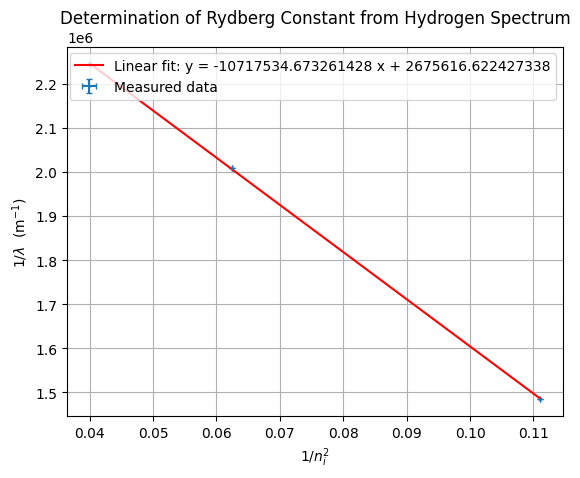

In [35]:
# Plot with best fit line
fig1, ax1 = plt.subplots()

ax1.errorbar(inv_n_i2, inv_lambda, yerr=inv_lambda_err, xerr=0, fmt='o', capsize=2, markersize=1, label='Measured data')
ax1.plot(inv_n_i2, inv_lambda_fit, 'r-', label=f'Linear fit: y = {slope} x + {yInt}')

#x-axis title
ax1.set_xlabel(r"$1/n_i^2$")

#y-axis title
ax1.set_ylabel(r"$1/\lambda$  (m$^{-1}$)")

#Figure title
plt.title("Determination of Rydberg Constant from Hydrogen Spectrum")

ax1.legend(loc='upper right', fontsize=10, frameon=True)
ax1.grid(True)
plt.show()

In [36]:
#Save a copy of the graph.
fig1.savefig("confirm_R.png", dpi=200)
plt.show()

In [37]:
# Reduced-chi squared analysis
Chi2 = np.sum(((inv_lambda - inv_lambda_fit) / inv_lambda_err) ** 2)

count = len(inv_lambda)
n = 2
dof = count - n

ReducedChi2 = Chi2 / dof

#Print chi squared
print("Chi-squared:", Chi2)
print("Degrees of freedom:", dof)
print("Reduced Chi-squared:", ReducedChi2)

Chi-squared: 894.8268401415473
Degrees of freedom: 1
Reduced Chi-squared: 894.8268401415473


### T-test between experimentally determined and theoretical Rydberg's constant

In [38]:
t_exp = (abs(R_exp - R_theory)) / R_exp_err

print("--- TEAL T-TEST COMPARISON ---")
print("t_exp =", t_exp)

if t_exp < 2:
    print("Therefore, experimental wavelength agrees with literature within uncertainty.")
else:
    print("Therefore, experimental wavelength does NOT agree with literature.")

--- TEAL T-TEST COMPARISON ---
t_exp = 2.911938310474688
Therefore, experimental wavelength does NOT agree with literature.
